<a href="https://colab.research.google.com/github/nidhi-059/Region-captioning-on-images-using-dl/blob/main/Task2_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install torchmetrics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 25.6 MB/s eta 0:00:00


In [3]:
import torch
import torch.nn as nn
from torchmetrics.classification import Accuracy
from torch.utils.data import DataLoader, Dataset
import matplotlib.pyplot as plt


In [4]:
torch.manual_seed(42)

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [6]:
class CustomDataset(Dataset):
    def __init__(self, features , labels):
        self.features = features
        self.Labels = labels

    def __len__(self):
        return self.features.shape[0]

    def __getitem__(self , index):
        return self.features[index] , self.Labels[index]

In [ ]:
!pip install mlxtend

In [ ]:
'''from mlxtend.data import loadlocal_mnist
train_x , train_y = loadlocal_mnist(images_path = '/content/train-images.idx3-ubyte',labels_path = '/content/train-labels.idx1-ubyte')
test_x , test_y = loadlocal_mnist(images_path = '/content/t10k-images.idx3-ubyte',labels_path = '/content/t10k-labels.idx1-ubyte')

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
#coverting numpy arrays into tensors and normalizing inputs
train_x = torch.tensor(train_x, dtype = torch.float32)
train_x= train_x / 255.0
train_y = torch.tensor(train_y , dtype = torch.long)

test_x = (torch.tensor(test_x , dtype = torch.float32)) / 255.0
test_y = (torch.tensor(test_y , dtype = torch.long))

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_x_scaled = scaler.fit_transform(train_x)
test_x_scaled = scaler.transform(test_x)'''

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
'''train_dataset = CustomDataset(train_x, train_y)
test_dataset = CustomDataset(test_x, test_y)'''

In [7]:
from torchvision import transforms
from torchvision import datasets
# Transform: convert to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # mean and std for MNIST
])

# Download and load the training data
train_dataset = datasets.MNIST(
    root='./data',
    train=True,
    transform=transform,
    download=True
)

test_dataset = datasets.MNIST(
    root='./data',
    train=False,
    transform=transform,
    download=True
)

# Data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

100%|██████████| 9.91M/9.91M [00:00<00:00, 18.5MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 497kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.54MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 8.32MB/s]


In [8]:
train_Loader = DataLoader(train_dataset , batch_size = 128, shuffle = True , pin_memory = True)
test_Loader = DataLoader(test_dataset , batch_size = 128 , shuffle = False , pin_memory = True)

In [9]:
class model(nn.Module):
    def __init__(self, num_features):
        super().__init__() #calling the constructor of the parent class
        self.model = nn.Sequential(
            nn.Linear(num_features,128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,10)

        )

    def forward(self,x):
        x = x.view(x.size(0), -1)
        return self.model(x)

In [10]:
loss_func = nn.CrossEntropyLoss()


In [11]:
learning_rate= 0.00089
epochs = 50



Epoch 1, Loss: 0.361535,
Epoch 2, Loss: 0.177655,
Epoch 3, Loss: 0.139211,
Epoch 4, Loss: 0.117410,
Epoch 5, Loss: 0.104059,
Epoch 6, Loss: 0.090594,
Epoch 7, Loss: 0.086746,
Epoch 8, Loss: 0.079030,
Epoch 9, Loss: 0.072114,
Epoch 10, Loss: 0.068127,
Epoch 11, Loss: 0.065587,
Epoch 12, Loss: 0.061880,
Epoch 13, Loss: 0.057645,
Epoch 14, Loss: 0.056309,
Epoch 15, Loss: 0.053922,
Epoch 16, Loss: 0.052669,
Epoch 17, Loss: 0.049479,
Epoch 18, Loss: 0.049786,
Epoch 19, Loss: 0.048458,
Epoch 20, Loss: 0.046430,
Epoch 21, Loss: 0.044356,
Epoch 22, Loss: 0.042163,
Epoch 23, Loss: 0.042265,
Epoch 24, Loss: 0.041249,
Epoch 25, Loss: 0.040572,
Epoch 26, Loss: 0.040553,
Epoch 27, Loss: 0.038553,
Epoch 28, Loss: 0.037029,
Epoch 29, Loss: 0.039446,
Epoch 30, Loss: 0.038500,
Epoch 31, Loss: 0.036887,
Epoch 32, Loss: 0.036793,
Epoch 33, Loss: 0.034363,
Epoch 34, Loss: 0.035307,
Epoch 35, Loss: 0.035749,
Epoch 36, Loss: 0.035512,
Epoch 37, Loss: 0.035508,
Epoch 38, Loss: 0.034424,
Epoch 39, Loss: 0.034

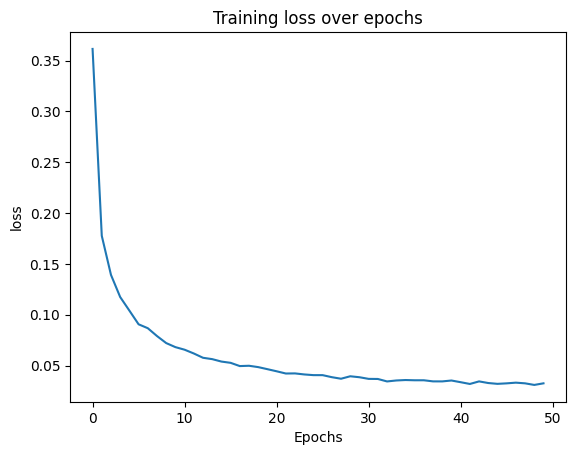

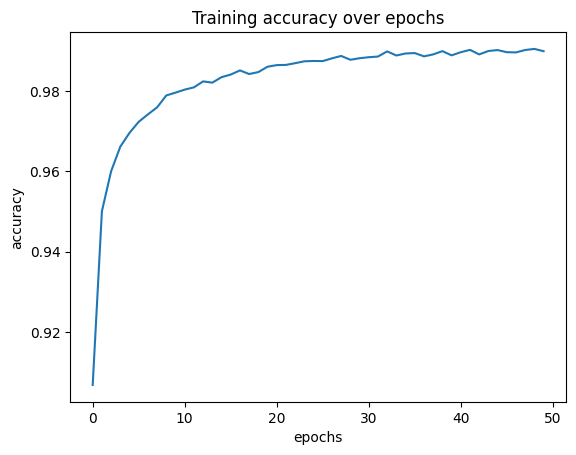

In [12]:
model1 = model(28*28)
model1 = model1.to(device)
losses = []
accuracy = []
optimizer = torch.optim.Adam(model1.parameters(),lr=learning_rate , weight_decay= 1e-4)
for epoch in range(epochs):
    total_labels = 0
    running_acc = 0.0
    running_loss = 0.0
    for batch_features, batch_labels in train_Loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)

        #forward pass
        y_predic = model1(batch_features)
        #calcuting loss
        loss = loss_func(y_predic , batch_labels)
        #clearing grads
        optimizer.zero_grad()
        #backward pass
        loss.backward()
        #updating parameters
        optimizer.step()
        _, predicted = torch.max(y_predic, dim=1)
        running_acc += (predicted == batch_labels).sum().item()
        total_labels += batch_labels.size(0)
        running_loss += loss.item()

    # Compute epoch accuracy
    avg_loss = running_loss / (len(train_Loader))
    avg_acc = running_acc / total_labels
    losses.append(avg_loss)
    accuracy.append(avg_acc)

    print(f"Epoch {epoch + 1}, Loss: {avg_loss:.6f},")

plt.plot(losses)
plt.title("Training loss over epochs")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.grid(False)
plt.show()
plt.plot(accuracy)
plt.title("Training accuracy over epochs")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.grid(False)
plt.show()

In [13]:
#Model evaluation
model1.eval()
total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in test_Loader:
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
    outputs = model1(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Test accuracy: {(correct/total)*100}%")

Test accuracy: 98.09%


In [14]:
#Model evaluation

total = 0
correct = 0

with torch.no_grad():

  for batch_features, batch_labels in train_Loader:
    batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
    outputs = model1(batch_features)

    _, predicted = torch.max(outputs, 1)

    total = total + batch_labels.shape[0]

    correct = correct + (predicted == batch_labels).sum().item()

print(f"Train accuracy : {(correct/total)*100}%")

Train accuracy : 99.885%


In [15]:
def predict_from_dataset(index, dataset, model, class_names, device):
    model.eval()

    # Get image and label from dataset
    image_tensor, label = dataset[index]  # image_tensor: [C, H, W], label: int
    input_tensor = image_tensor.unsqueeze(0).to(device)  # add batch dimension

    # Predict
    with torch.no_grad():
        output = model(input_tensor)  # logits
        _, predicted_idx = torch.max(output, dim=1)
        predicted_class = class_names[predicted_idx.item()]
        actual_class = class_names[label if isinstance(label, int) else label.item()]

    # Undo normalization for display (assumes mean=0.5, std=0.5)
    img = image_tensor * 0.5 + 0.5  # denormalize
    img = img.permute(1, 2, 0).cpu().numpy()  # [C, H, W] → [H, W, C]

    # Display image
    plt.imshow(img)
    plt.title(f"Predicted: {predicted_class} | Actual: {actual_class}")
    plt.axis('off')
    plt.show()

    print(f"Predicted Class: {predicted_class}")
    print(f"Actual Class: {actual_class}")

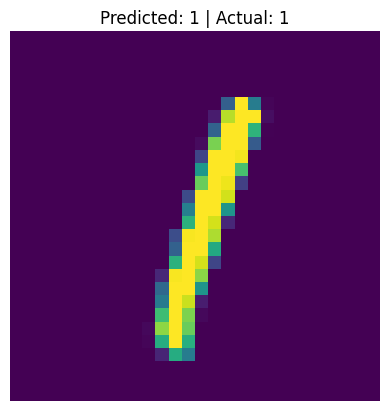

Predicted Class: 1
Actual Class: 1


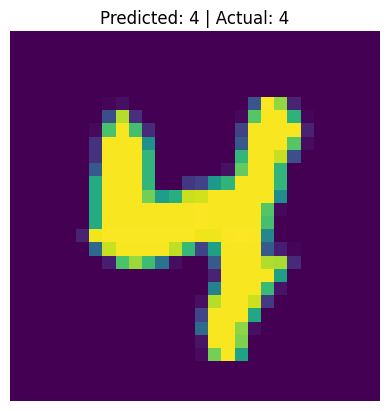

Predicted Class: 4
Actual Class: 4


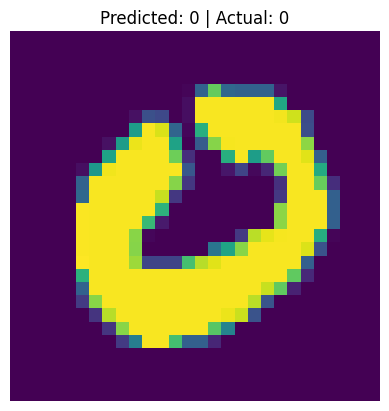

Predicted Class: 0
Actual Class: 0


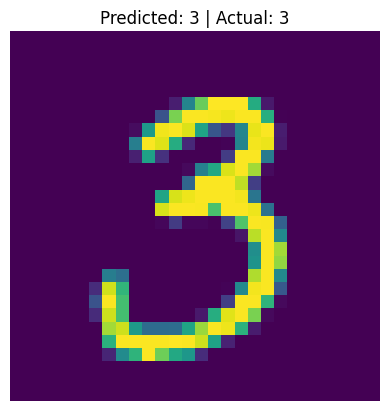

Predicted Class: 3
Actual Class: 3


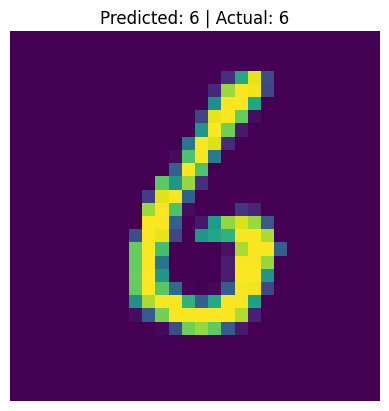

Predicted Class: 6
Actual Class: 6


In [19]:
predict_from_dataset(
    index=5,
    dataset=test_dataset,
    model=model1,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)
predict_from_dataset(
    index=85,
    dataset=test_dataset,
    model=model1,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)
predict_from_dataset(
    index=25,
    dataset=test_dataset,
    model=model1,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)
predict_from_dataset(
    index=90,
    dataset=test_dataset,
    model=model1,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)
predict_from_dataset(
    index=50,
    dataset=test_dataset,
    model=model1,
    class_names=['0', '1', '2', '3','4','5','6','7','8','9'],  # adjust to your dataset
    device=device
)